Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


spotify_dataset = pd.read_csv("data.csv")

print(spotify_dataset['liked'].value_counts())


print(spotify_dataset.head())


liked
1    100
0     95
Name: count, dtype: int64
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      

The label of interest is "liked", which takes a value of either 0 or 1

Preprocessing

In [35]:
#X is the feature set before any processing, y is the column of the original dataframe that contained the label
x = spotify_dataset[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']].values
y = spotify_dataset['liked'] 

#x_new is the new set of features that have been scaled with SKLearn's standard scaler. This normalizes the data of each column.
x_new = StandardScaler().fit_transform(x)

Creating the KNN Classifier Object with SKLearn

In [36]:
model = KNeighborsClassifier()

model.fit(x_new, y)



KNeighborsClassifier()

Training the Hyperparamter K with SKLearn's Grid Search

In [37]:
param_grid = {'n_neighbors': range(1, 70)}

grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'recall')

grid_search.fit(x_new, y)

best_k = grid_search.best_params_['n_neighbors']
print("Optimal K value: ", best_k)

Optimal K value:  39


In [38]:
model = KNeighborsClassifier(n_neighbors=39)
model.fit(x_new, y)

KNeighborsClassifier(n_neighbors=39)

In [42]:
results = permutation_importance(model, x_new, y, scoring='recall', n_repeats=30, random_state=0)

# Create DataFrame with feature importances
feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                 'duration_ms', 'time_signature']


importance_df = pd.DataFrame({'feature': feature_names, 'importance': results.importances_mean})


importance_df = importance_df.sort_values(by='importance', ascending=False)

print(importance_df)


             feature  importance
11       duration_ms    0.040667
7   instrumentalness    0.027667
0       danceability    0.021333
3           loudness    0.016667
10             tempo    0.015000
6       acousticness    0.007667
9            valence    0.007667
1             energy    0.004333
4               mode    0.003667
5        speechiness    0.003667
8           liveness    0.003000
12    time_signature    0.000333
2                key    0.000000


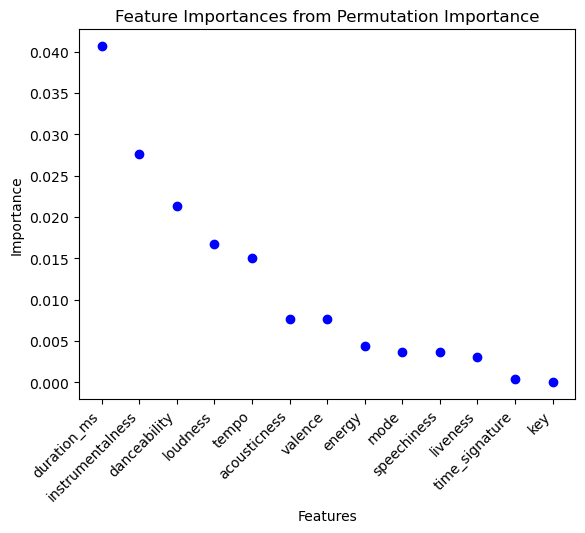

In [46]:
plt.scatter(importance_df['feature'], importance_df['importance'], color='blue')

plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances from Permutation Importance")

plt.xticks(rotation=45, ha='right')

plt.show()